In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Bedu/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df = df[df.bmi.notna()]

In [5]:
X = df[['avg_glucose_level', 'bmi']]
Y = df['age']

In [6]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2945, 2)
(1964, 2)
(2945,)
(1964,)


In [7]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =433.0305187142213
Pruebas: MSE =439.4391025344665


In [9]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion
0,60.0,46.970369
1,26.0,37.325445
2,56.0,65.873244
3,10.0,37.065085
4,65.0,50.223592
5,37.0,38.942197
6,24.0,48.650678
7,25.0,39.565687
8,31.0,43.343229
9,28.0,38.603551


In [12]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =378.7534602949013
Pruebas: MSE =388.46817702566625


,valor_real,prediccion,diferencia
0,60.0,47.070184,12.929816
1,26.0,37.481308,-11.481308
2,56.0,39.950449,16.049551
3,10.0,35.150920,-25.150920
4,65.0,50.708363,14.291637
5,37.0,39.553764,-2.553764
6,24.0,50.215820,-26.215820
7,25.0,46.046197,-21.046197
8,31.0,45.473529,-14.473529
9,28.0,37.648740,-9.648740


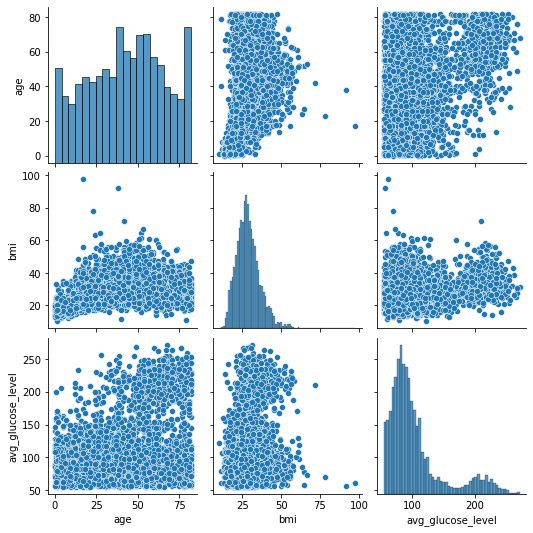

In [13]:
import seaborn as sns
sns.pairplot(df[["age","bmi","avg_glucose_level"]])